In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('nyc-rolling-sales.csv')
print(df.head())

   Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0           4        1  ALPHABET CITY   
1           5        1  ALPHABET CITY   
2           6        1  ALPHABET CITY   
3           7        1  ALPHABET CITY   
4           8        1  ALPHABET CITY   

                       BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  07 RENTALS - WALKUP APARTMENTS                                2A    392   
1  07 RENTALS - WALKUP APARTMENTS                                 2    399   
2  07 RENTALS - WALKUP APARTMENTS                                 2    399   
3  07 RENTALS - WALKUP APARTMENTS                                2B    402   
4  07 RENTALS - WALKUP APARTMENTS                                2A    404   

   LOT EASE-MENT BUILDING CLASS AT PRESENT                 ADDRESS  ...  \
0    6                                  C2            153 AVENUE B  ...   
1   26                                  C7   234 EAST 4TH   STREET  ...   
2   39                                  C7   197 EAST 3RD  

In [3]:
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
test = df[df['SALE PRICE'].isna()]
df = df[~df['SALE PRICE'].isna()]
print(df.shape)

(69987, 22)


In [4]:
df = df[(df['SALE PRICE'] > 1000)]
print(df.shape)

(58604, 22)


In [5]:
print(df.columns)
print(df.shape)

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')
(58604, 22)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58604 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      58604 non-null  int64  
 1   BOROUGH                         58604 non-null  int64  
 2   NEIGHBORHOOD                    58604 non-null  object 
 3   BUILDING CLASS CATEGORY         58604 non-null  object 
 4   TAX CLASS AT PRESENT            58604 non-null  object 
 5   BLOCK                           58604 non-null  int64  
 6   LOT                             58604 non-null  int64  
 7   EASE-MENT                       58604 non-null  object 
 8   BUILDING CLASS AT PRESENT       58604 non-null  object 
 9   ADDRESS                         58604 non-null  object 
 10  APARTMENT NUMBER                58604 non-null  object 
 11  ZIP CODE                        58604 non-null  int64  
 12  RESIDENTIAL UNITS               

In [7]:
print(df.isna().sum())

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64


In [8]:
print(df.describe())

         Unnamed: 0       BOROUGH         BLOCK           LOT      ZIP CODE  \
count  58604.000000  58604.000000  58604.000000  58604.000000  58604.000000   
mean   10305.223125      2.935619   4138.826428    391.498004  10706.334943   
std     7082.175863      1.329071   3566.032489    670.084526   1255.597375   
min        4.000000      1.000000      1.000000      1.000000      0.000000   
25%     4261.000000      2.000000   1272.000000     21.000000  10280.000000   
50%     9047.000000      3.000000   3149.000000     50.000000  11207.000000   
75%    15780.250000      4.000000   6099.000000   1002.000000  11356.000000   
max    26738.000000      5.000000  16319.000000   9106.000000  11694.000000   

       RESIDENTIAL UNITS  COMMERCIAL UNITS   TOTAL UNITS    YEAR BUILT  \
count       58604.000000      58604.000000  58604.000000  58604.000000   
mean            1.705583          0.163948      1.881169   1811.956146   
std            14.172163          9.917320     17.404054    502.80

In [9]:
del df['Unnamed: 0']
del df['EASE-MENT']

In [10]:
df = df.drop_duplicates(df.columns, keep='last')

sum(df.duplicated(df.columns))

0

In [11]:
df['YEAR BUILT'] = df['YEAR BUILT'].replace(0, 1915)

In [12]:
df['YEAR BUILT'].value_counts()

1915    4946
1920    4013
1930    3333
1925    2868
1910    2349
        ... 
1855       1
1883       1
1871       1
1891       1
2017       1
Name: YEAR BUILT, Length: 152, dtype: int64

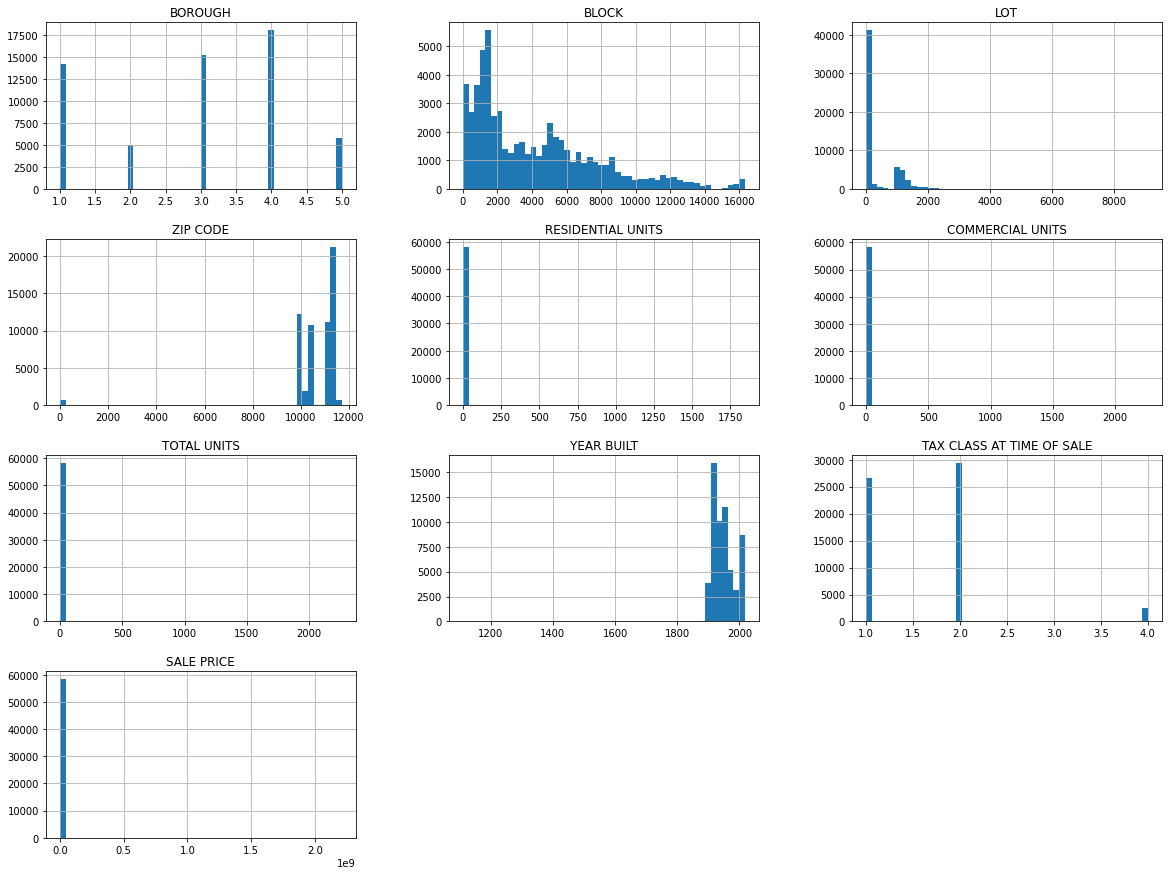

In [13]:
df.hist(bins=50,figsize=(20,15))
plt.show()

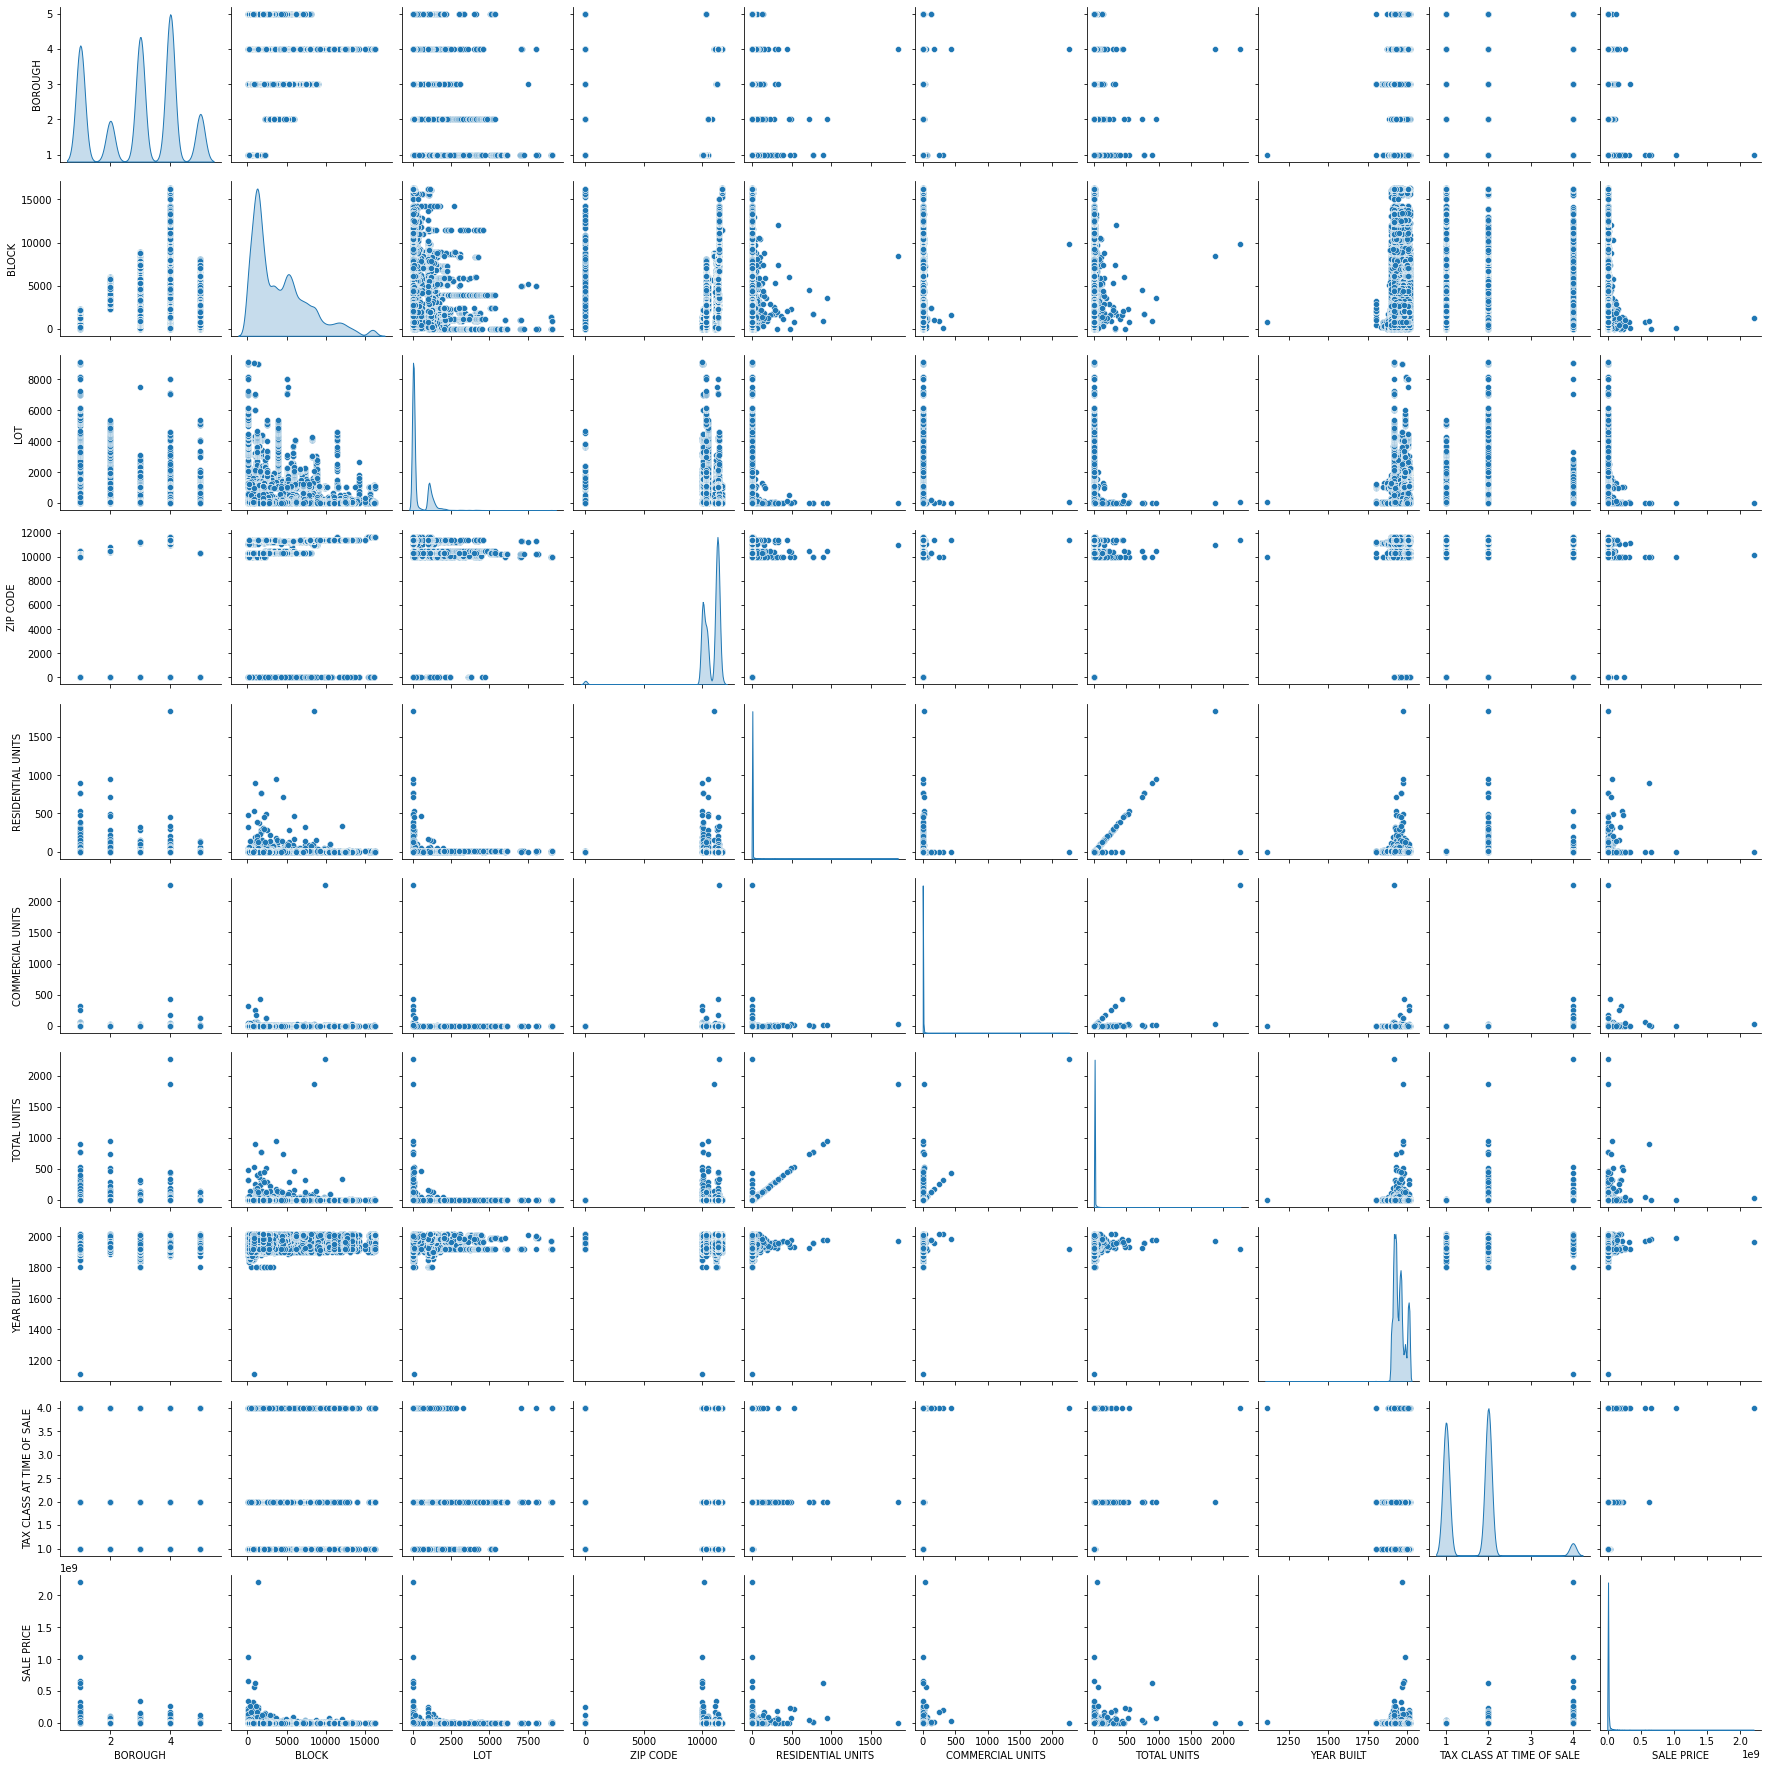

In [14]:
sns.pairplot(df , diag_kind = 'kde');

In [15]:
df.shape

(58470, 20)

In [16]:
df['SALE DATE'].dtype

dtype('O')

In [17]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

In [18]:
df['SALE DATE'].dtype

dtype('<M8[ns]')

In [19]:
df.sort_values(by=['SALE DATE'], inplace=True, ascending=True, ignore_index=True)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,MURRAY HILL,49 CONDO WAREHOUSES/FACTORY/INDUS,4,858,1032,RW,31 EAST 28TH STREET,SU-9,10016,0,0,1,-,-,1915,4,RW,25000.0,2016-01-09
1,3,BAY RIDGE,04 TAX CLASS 1 CONDOS,1A,5868,1025,R3,14 BAY RIDGE AVENUE,2C,11220,1,0,1,0,0,2002,1,R3,410000.0,2016-01-09
2,3,WILLIAMSBURG-NORTH,44 CONDO PARKING,4,2367,1034,RG,280 METROPOLITAN AVENUE,P5,11211,0,0,1,0,0,2014,4,RG,28001.0,2016-01-09
3,4,LITTLE NECK,10 COOPS - ELEVATOR APARTMENTS,2,8256,108,D4,"54-40 LITTLE NECK PARKWAY, 3P",,11362,0,0,0,-,-,1962,2,D4,198421.0,2016-01-09
4,4,OAKLAND GARDENS,09 COOPS - WALKUP APARTMENTS,2,7668,10,C6,"67-62A 223RD PLACE, 6762A",,11364,0,0,0,-,-,1949,2,C6,240000.0,2016-01-09


In [20]:
df['Sale Day'] = df['SALE DATE'].dt.day
df['Sale Year'] = df['SALE DATE'].dt.year
df['Sale Month'] = df['SALE DATE'].dt.month

In [21]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Sale Day,Sale Year,Sale Month
0,1,MURRAY HILL,49 CONDO WAREHOUSES/FACTORY/INDUS,4,858,1032,RW,31 EAST 28TH STREET,SU-9,10016,...,-,-,1915,4,RW,25000.0,2016-01-09,9,2016,1
1,3,BAY RIDGE,04 TAX CLASS 1 CONDOS,1A,5868,1025,R3,14 BAY RIDGE AVENUE,2C,11220,...,0,0,2002,1,R3,410000.0,2016-01-09,9,2016,1
2,3,WILLIAMSBURG-NORTH,44 CONDO PARKING,4,2367,1034,RG,280 METROPOLITAN AVENUE,P5,11211,...,0,0,2014,4,RG,28001.0,2016-01-09,9,2016,1
3,4,LITTLE NECK,10 COOPS - ELEVATOR APARTMENTS,2,8256,108,D4,"54-40 LITTLE NECK PARKWAY, 3P",,11362,...,-,-,1962,2,D4,198421.0,2016-01-09,9,2016,1
4,4,OAKLAND GARDENS,09 COOPS - WALKUP APARTMENTS,2,7668,10,C6,"67-62A 223RD PLACE, 6762A",,11364,...,-,-,1949,2,C6,240000.0,2016-01-09,9,2016,1


In [22]:
df['Sale Year'].value_counts()

2017    38662
2016    19808
Name: Sale Year, dtype: int64

In [23]:
df['TOTAL UNITS'].value_counts()

1      26633
0      16513
2       9895
3       2861
4        779
       ...  
76         1
135        1
736        1
120        1
69         1
Name: TOTAL UNITS, Length: 149, dtype: int64

In [24]:
del df['SALE DATE']
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,Sale Day,Sale Year,Sale Month
0,1,MURRAY HILL,49 CONDO WAREHOUSES/FACTORY/INDUS,4,858,1032,RW,31 EAST 28TH STREET,SU-9,10016,...,1,-,-,1915,4,RW,25000.0,9,2016,1
1,3,BAY RIDGE,04 TAX CLASS 1 CONDOS,1A,5868,1025,R3,14 BAY RIDGE AVENUE,2C,11220,...,1,0,0,2002,1,R3,410000.0,9,2016,1
2,3,WILLIAMSBURG-NORTH,44 CONDO PARKING,4,2367,1034,RG,280 METROPOLITAN AVENUE,P5,11211,...,1,0,0,2014,4,RG,28001.0,9,2016,1
3,4,LITTLE NECK,10 COOPS - ELEVATOR APARTMENTS,2,8256,108,D4,"54-40 LITTLE NECK PARKWAY, 3P",,11362,...,0,-,-,1962,2,D4,198421.0,9,2016,1
4,4,OAKLAND GARDENS,09 COOPS - WALKUP APARTMENTS,2,7668,10,C6,"67-62A 223RD PLACE, 6762A",,11364,...,0,-,-,1949,2,C6,240000.0,9,2016,1


In [25]:
print(df['TAX CLASS AT TIME OF SALE'].dtype)
print(df['TAX CLASS AT PRESENT'].dtype)
print(df['LAND SQUARE FEET'].dtype)
print(df['GROSS SQUARE FEET'].dtype)
print(df['SALE PRICE'].dtype)
print(df['BOROUGH'].dtype)

int64
object
object
object
float64
int64


In [26]:
'''df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')'''
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
#df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
'''df['BOROUGH'] = df['BOROUGH'].astype('category')
df['NEIGHBORHOOD'] = df['NEIGHBORHOOD'].astype('category')
df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].astype('category')
df['Sale Day'] = df['Sale Day'].astype('category')
df['Sale Month'] = df['Sale Month'].astype('category')
df['Sale Year'] = df['Sale Year'].astype('category')
df['BUILDING CLASS AT PRESENT'] = df['BUILDING CLASS AT PRESENT'].astype('category')
df['ZIP CODE'] = df['ZIP CODE'].astype('category')
df['BUILDING CLASS AT TIME OF SALE'] = df['BUILDING CLASS AT TIME OF SALE'].astype('category')'''

"df['BOROUGH'] = df['BOROUGH'].astype('category')\ndf['NEIGHBORHOOD'] = df['NEIGHBORHOOD'].astype('category')\ndf['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].astype('category')\ndf['Sale Day'] = df['Sale Day'].astype('category')\ndf['Sale Month'] = df['Sale Month'].astype('category')\ndf['Sale Year'] = df['Sale Year'].astype('category')\ndf['BUILDING CLASS AT PRESENT'] = df['BUILDING CLASS AT PRESENT'].astype('category')\ndf['ZIP CODE'] = df['ZIP CODE'].astype('category')\ndf['BUILDING CLASS AT TIME OF SALE'] = df['BUILDING CLASS AT TIME OF SALE'].astype('category')"

In [27]:
print(df['TAX CLASS AT TIME OF SALE'].dtype)
print(df['TAX CLASS AT PRESENT'].dtype)
print(df['LAND SQUARE FEET'].dtype)
print(df['GROSS SQUARE FEET'].dtype)
print(df['SALE PRICE'].dtype)
print(df['BOROUGH'].dtype)
print(df['NEIGHBORHOOD'].dtype)
print(df['BUILDING CLASS CATEGORY'].dtype)
print(df['LOT'].dtype)
print(df['BUILDING CLASS AT PRESENT'].dtype)
print(df['TOTAL UNITS'].dtype)
print(df['ZIP CODE'].dtype)
print(df['YEAR BUILT'].dtype)
print(df['BUILDING CLASS AT TIME OF SALE'].dtype)

int64
object
float64
float64
float64
int64
object
object
int64
object
int64
int64
int64
object


In [28]:
df.columns[df.isnull().any()]

Index(['LAND SQUARE FEET', 'GROSS SQUARE FEET'], dtype='object')

In [29]:
df['SALE PRICE'].value_counts()

450000.0      427
550000.0      416
650000.0      414
600000.0      409
700000.0      382
             ... 
766475.0        1
18940564.0      1
491800.0        1
794477.0        1
1157500.0       1
Name: SALE PRICE, Length: 9986, dtype: int64

In [30]:
test_1 = df[df['LAND SQUARE FEET'].isna()]
print(test_1.shape)

(21000, 22)


In [30]:
print(df.describe())

            BOROUGH         BLOCK           LOT      ZIP CODE  \
count  58470.000000  58470.000000  58470.000000  58470.000000   
mean       2.936326   4141.861707    391.897760  10706.881238   
std        1.328392   3566.465906    670.485063   1255.934755   
min        1.000000      1.000000      1.000000      0.000000   
25%        2.000000   1274.250000     21.000000  10280.000000   
50%        3.000000   3152.000000     50.000000  11207.000000   
75%        4.000000   6099.000000   1002.000000  11357.000000   
max        5.000000  16319.000000   9106.000000  11694.000000   

       RESIDENTIAL UNITS  COMMERCIAL UNITS   TOTAL UNITS  LAND SQUARE FEET  \
count       58470.000000      58470.000000  58470.000000      3.747000e+04   
mean            1.701659          0.154575      1.867813      3.621612e+03   
std            14.137390          9.762819     17.288132      4.341692e+04   
min             0.000000          0.000000      0.000000      0.000000e+00   
25%             0.000000

In [31]:
print(df['LAND SQUARE FEET'].mean())
print(df['LAND SQUARE FEET'].median())
print(df['LAND SQUARE FEET'].mode()[0])

3621.6120629837205
2200.0
0.0


In [32]:
print(df['GROSS SQUARE FEET'].mean())
print(df['GROSS SQUARE FEET'].median())
print(df['GROSS SQUARE FEET'].mode())

3379.9492934105797
1548.0
0    0.0
Name: GROSS SQUARE FEET, dtype: float64


In [33]:
df.shape

(58470, 22)

In [34]:
df['LAND SQUARE FEET']=df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].mean())
df['GROSS SQUARE FEET']=df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].mean())

In [35]:
print(df['LAND SQUARE FEET'].mean())
print(df['LAND SQUARE FEET'].median())
print(df['LAND SQUARE FEET'].mode()[0])

3621.6120629837205
3621.6120629837205
3621.6120629837205


In [36]:
df['APARTMENT NUMBER'].value_counts()

         45162
3B         217
3A         216
2B         206
2A         205
         ...  
CFU          1
N-816        1
REAR         1
88A          1
A5D          1
Name: APARTMENT NUMBER, Length: 3030, dtype: int64

In [37]:
df['ADDRESS'].value_counts()

131-05 40TH   ROAD       209
429 KENT AVENUE          157
131-03 40TH   ROAD       147
265 STATE STREET         126
550 VANDERBILT AVENUE    124
                        ... 
768 LAMONT AVENUE          1
593 EAST 83RD STREET       1
315 JEFFERSON STREET       1
646 ELLSWORTH AVE          1
169 EAST 93RD STREET       1
Name: ADDRESS, Length: 48600, dtype: int64

In [38]:
del df['APARTMENT NUMBER']

In [39]:
df['SALE PRICE'].value_counts()

450000.0      427
550000.0      416
650000.0      414
600000.0      409
700000.0      382
             ... 
766475.0        1
18940564.0      1
491800.0        1
794477.0        1
1157500.0       1
Name: SALE PRICE, Length: 9986, dtype: int64

In [40]:
df['LAND SQUARE FEET'].value_counts()

3621.612063     21000
0.000000         8082
2000.000000      2375
2500.000000      2125
4000.000000      1908
                ...  
1315.000000         1
2941.000000         1
1709.000000         1
2206.000000         1
27000.000000        1
Name: LAND SQUARE FEET, Length: 4765, dtype: int64

In [41]:
df['GROSS SQUARE FEET'].value_counts()

3379.949293     21532
0.000000         8538
1800.000000       244
1600.000000       235
1440.000000       233
                ...  
4895.000000         1
3457.000000         1
45624.000000        1
5404.000000         1
593.000000          1
Name: GROSS SQUARE FEET, Length: 4456, dtype: int64

In [42]:
#df['SALE PRICE'].replace(to_replace = 0, value = df['SALE PRICE'].median(), inplace=True)

In [43]:
df['LAND SQUARE FEET'].replace(to_replace = 0, value = df['LAND SQUARE FEET'].median(), inplace=True)
df['LAND SQUARE FEET'].value_counts()

3621.612063     29082
2000.000000      2375
2500.000000      2125
4000.000000      1908
1800.000000       762
                ...  
5845.000000         1
12250.000000        1
5129.000000         1
7570.000000         1
27000.000000        1
Name: LAND SQUARE FEET, Length: 4764, dtype: int64

In [44]:
df['GROSS SQUARE FEET'].replace(to_replace = 0, value = df['GROSS SQUARE FEET'].median(), inplace=True)
df['GROSS SQUARE FEET'].value_counts()

3379.949293     21532
2550.000000      8563
1800.000000       244
1600.000000       235
1440.000000       233
                ...  
4895.000000         1
3457.000000         1
45624.000000        1
5404.000000         1
593.000000          1
Name: GROSS SQUARE FEET, Length: 4455, dtype: int64

In [45]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df.NEIGHBORHOOD) 
df.NEIGHBORHOOD = le.transform(df.NEIGHBORHOOD)
le.fit(df['ZIP CODE']) 
df['ZIP CODE'] = le.transform(df['ZIP CODE'])
le.fit(df['ADDRESS']) 
df['ADDRESS'] = le.transform(df['ADDRESS'])
le.fit(df['BOROUGH']) 
df['BOROUGH'] = le.transform(df['BOROUGH'])
le.fit(df['BUILDING CLASS CATEGORY']) 
df['BUILDING CLASS CATEGORY'] = le.transform(df['BUILDING CLASS CATEGORY'])
le.fit(df['BUILDING CLASS AT PRESENT']) 
df['BUILDING CLASS AT PRESENT'] = le.transform(df['BUILDING CLASS AT PRESENT'])
le.fit(df['BUILDING CLASS AT TIME OF SALE']) 
df['BUILDING CLASS AT TIME OF SALE'] = le.transform(df['BUILDING CLASS AT TIME OF SALE'])
le.fit(df['TAX CLASS AT PRESENT']) 
df['TAX CLASS AT PRESENT'] = le.transform(df['TAX CLASS AT PRESENT'])
le.fit(df['TAX CLASS AT TIME OF SALE']) 
df['TAX CLASS AT TIME OF SALE'] = le.transform(df['TAX CLASS AT TIME OF SALE'])

In [47]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [48]:
print(test.shape)

(14561, 22)


In [49]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58470 entries, 0 to 58469
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         58470 non-null  int64  
 1   NEIGHBORHOOD                    58470 non-null  int32  
 2   BUILDING CLASS CATEGORY         58470 non-null  int32  
 3   TAX CLASS AT PRESENT            58470 non-null  int32  
 4   BLOCK                           58470 non-null  int64  
 5   LOT                             58470 non-null  int64  
 6   BUILDING CLASS AT PRESENT       58470 non-null  int32  
 7   ADDRESS                         58470 non-null  int32  
 8   ZIP CODE                        58470 non-null  int64  
 9   RESIDENTIAL UNITS               58470 non-null  int64  
 10  COMMERCIAL UNITS                58470 non-null  int64  
 11  TOTAL UNITS                     58470 non-null  int64  
 12  LAND SQUARE FEET                

In [50]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [51]:
'''def remove_outlier(df, col_name):
  q1 = df[col_name].quantile(0.25)
  q3 = df[col_name].quantile(0.75)
  iqr = q3-q1 #Interquartile range
  fence_low  = q1-1.5*iqr
  fence_high = q3+1.5*iqr
  df_out = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]
  return df_out

df = remove_outlier(df, 'SALE PRICE')

print(df.shape)'''

"def remove_outlier(df, col_name):\n  q1 = df[col_name].quantile(0.25)\n  q3 = df[col_name].quantile(0.75)\n  iqr = q3-q1 #Interquartile range\n  fence_low  = q1-1.5*iqr\n  fence_high = q3+1.5*iqr\n  df_out = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]\n  return df_out\n\ndf = remove_outlier(df, 'SALE PRICE')\n\nprint(df.shape)"

In [52]:
'''def remove_outlier(df, col_name):
  q1 = df[col_name].quantile(0.25)
  q3 = df[col_name].quantile(0.75)
  iqr = q3-q1 #Interquartile range
  fence_low  = q1-1.5*iqr
  fence_high = q3+1.5*iqr
  df_out = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]
  return df_out

df = remove_outlier(df, 'GROSS SQUARE FEET')

print(df.shape)'''

"def remove_outlier(df, col_name):\n  q1 = df[col_name].quantile(0.25)\n  q3 = df[col_name].quantile(0.75)\n  iqr = q3-q1 #Interquartile range\n  fence_low  = q1-1.5*iqr\n  fence_high = q3+1.5*iqr\n  df_out = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]\n  return df_out\n\ndf = remove_outlier(df, 'GROSS SQUARE FEET')\n\nprint(df.shape)"

In [53]:
'''def remove_outlier(df, col_name):
  q1 = df[col_name].quantile(0.25)
  q3 = df[col_name].quantile(0.75)
  iqr = q3-q1 #Interquartile range
  fence_low  = q1-1.5*iqr
  fence_high = q3+1.5*iqr
  df_out = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]
  return df_out

df = remove_outlier(df, 'BLOCK')

print(df.shape)'''

"def remove_outlier(df, col_name):\n  q1 = df[col_name].quantile(0.25)\n  q3 = df[col_name].quantile(0.75)\n  iqr = q3-q1 #Interquartile range\n  fence_low  = q1-1.5*iqr\n  fence_high = q3+1.5*iqr\n  df_out = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]\n  return df_out\n\ndf = remove_outlier(df, 'BLOCK')\n\nprint(df.shape)"

In [54]:
'''def remove_outlier(df, col_name):
  q1 = df[col_name].quantile(0.25)
  q3 = df[col_name].quantile(0.75)
  iqr = q3-q1 #Interquartile range
  fence_low  = q1-1.5*iqr
  fence_high = q3+1.5*iqr
  df_out = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]
  return df_out

df = remove_outlier(df, 'LOT')

print(df.shape)'''

"def remove_outlier(df, col_name):\n  q1 = df[col_name].quantile(0.25)\n  q3 = df[col_name].quantile(0.75)\n  iqr = q3-q1 #Interquartile range\n  fence_low  = q1-1.5*iqr\n  fence_high = q3+1.5*iqr\n  df_out = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]\n  return df_out\n\ndf = remove_outlier(df, 'LOT')\n\nprint(df.shape)"

In [55]:
'''def remove_outlier(df, col_name):
  q1 = df[col_name].quantile(0.25)
  q3 = df[col_name].quantile(0.75)
  iqr = q3-q1 #Interquartile range
  fence_low  = q1-1.5*iqr
  fence_high = q3+1.5*iqr
  df_out = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]
  return df_out

df = remove_outlier(df, 'TOTAL UNITS')

print(df.shape)'''

"def remove_outlier(df, col_name):\n  q1 = df[col_name].quantile(0.25)\n  q3 = df[col_name].quantile(0.75)\n  iqr = q3-q1 #Interquartile range\n  fence_low  = q1-1.5*iqr\n  fence_high = q3+1.5*iqr\n  df_out = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]\n  return df_out\n\ndf = remove_outlier(df, 'TOTAL UNITS')\n\nprint(df.shape)"

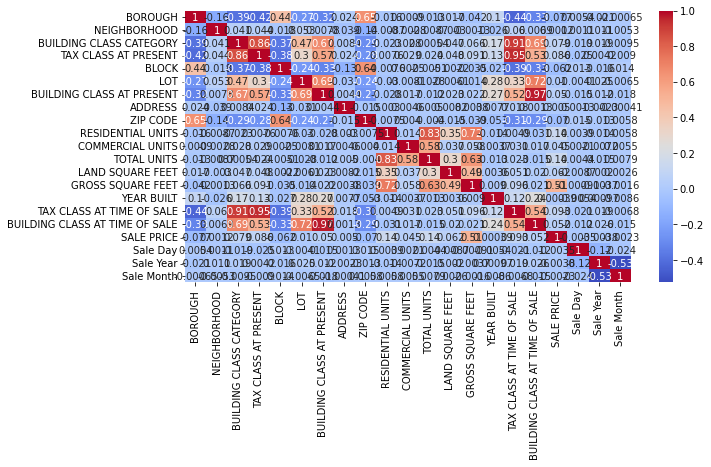

In [56]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),annot = True , cmap = 'coolwarm' );

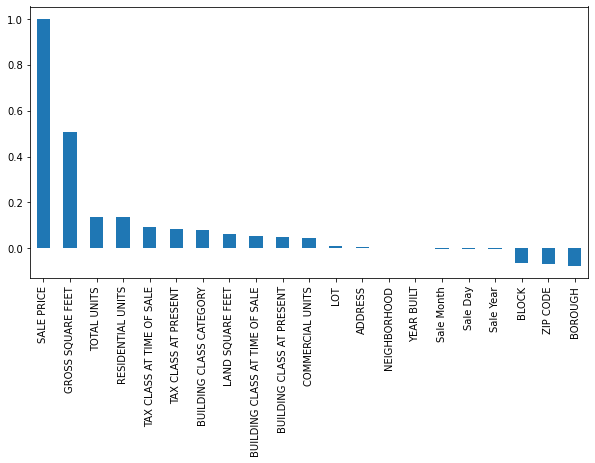

In [57]:
corr_mat = df.corr()
plt.figure(figsize = (10,5))
corr_mat['SALE PRICE'].sort_values(ascending = False).plot(kind = 'bar');

In [58]:
df.corr()['SALE PRICE'].sort_values(ascending=False).abs()

SALE PRICE                        1.000000
GROSS SQUARE FEET                 0.506130
TOTAL UNITS                       0.137264
RESIDENTIAL UNITS                 0.136739
TAX CLASS AT TIME OF SALE         0.093368
TAX CLASS AT PRESENT              0.085749
BUILDING CLASS CATEGORY           0.079423
LAND SQUARE FEET                  0.061615
BUILDING CLASS AT TIME OF SALE    0.051850
BUILDING CLASS AT PRESENT         0.049639
COMMERCIAL UNITS                  0.044954
LOT                               0.010010
ADDRESS                           0.004988
NEIGHBORHOOD                      0.001226
YEAR BUILT                        0.000389
Sale Month                        0.002266
Sale Day                          0.003471
Sale Year                         0.003824
BLOCK                             0.062392
ZIP CODE                          0.069814
BOROUGH                           0.077027
Name: SALE PRICE, dtype: float64

In [61]:
del df['NEIGHBORHOOD']
del df['ADDRESS']
del df['Sale Month']
del df['YEAR BUILT']
del df['Sale Year']
del df['Sale Day']


KeyError: 'NEIGHBORHOOD'

In [62]:
del df['COMMERCIAL UNITS']

In [63]:
df[["TOTAL UNITS", "SALE PRICE"]].groupby(['TOTAL UNITS'], as_index=False).count().sort_values(by='SALE PRICE', ascending=False)

,TOTAL UNITS,SALE PRICE
1,1,26633
0,0,16513
2,2,9895
3,3,2861
4,4,779
...,...,...
110,145,1
111,146,1
57,57,1
78,81,1


In [64]:
df = df[(df['TOTAL UNITS'] > 0) & (df['TOTAL UNITS'] != 2261)]

In [65]:
df['TOTAL UNITS'].value_counts()

1      26633
2       9895
3       2861
4        779
6        398
       ...  
104        1
185        1
76         1
135        1
69         1
Name: TOTAL UNITS, Length: 147, dtype: int64

In [66]:
#df['TOTAL UNITS'].replace(to_replace = 0, value = df['TOTAL UNITS'].mode()[0], inplace=True)

In [67]:
df['TOTAL UNITS'].value_counts()

1      26633
2       9895
3       2861
4        779
6        398
       ...  
104        1
185        1
76         1
135        1
69         1
Name: TOTAL UNITS, Length: 147, dtype: int64

In [68]:
df.shape

(41956, 14)

In [69]:
df.head()

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,0,45,9,858,1032,130,14,0,1,3621.612063,3379.949293,2,130,25000.0
1,2,3,2,5868,1025,115,113,1,1,3621.612063,2550.000000,0,115,410000.0
2,2,40,9,2367,1034,123,104,0,1,3621.612063,2550.000000,2,123,28001.0
6,2,26,9,2661,16,37,115,0,1,23750.000000,23000.000000,2,36,10564030.0
8,3,1,1,9470,39,12,165,2,2,2748.000000,1376.000000,0,11,540000.0


In [70]:
df['LOT'].value_counts()

1       679
20      426
12      424
21      421
18      414
       ... 
1766      1
3238      1
2300      1
8131      1
2018      1
Name: LOT, Length: 2302, dtype: int64

In [71]:
df['BLOCK'].value_counts()

5066     387
16       201
2135     182
4978     181
170      128
        ... 
12817      1
5907       1
16283      1
12760      1
13515      1
Name: BLOCK, Length: 10146, dtype: int64

In [72]:
from sklearn import preprocessing
columns = df.columns
for i in columns:
    if df.dtypes[i] is object:
        print("Cannot process object data")
    

## if skew is 0.5 and -0.5 i.e its normal distribution and use scaler else normalise
scale_list = []
normalise_list = []
data_skew = df.skew()

for i in columns:
    if data_skew[i] >= -0.5 and data_skew[i] <= 0.5:
        scale_list.append(i)
    else:
        normalise_list.append(i)
print(scale_list)
print(normalise_list)

#standard_scaler = preprocessing.StandardScaler()
#standard_scaler.fit()

['BOROUGH', 'ZIP CODE']
['BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT', 'RESIDENTIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE']


In [73]:
col_names = ['SALE PRICE']
features = df[col_names]
scaler = preprocessing.StandardScaler().fit(features.values)
features = scaler.transform(features.values)
print(features)
df[col_names] = features
print(df['SALE PRICE'])
print(df['SALE PRICE'].shape)

[[-0.11980311]
 [-0.09311711]
 [-0.1195951 ]
 ...
 [-0.05048196]
 [-0.07024339]
 [-0.07161963]]
0       -0.119803
1       -0.093117
2       -0.119595
6        0.610702
8       -0.084106
           ...   
58462   -0.104108
58463    0.065647
58465   -0.050482
58468   -0.070243
58469   -0.071620
Name: SALE PRICE, Length: 41956, dtype: float64
(41956,)


C:\Users\abulf\AppData\Local\Temp\ipykernel_20500\3859910377.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_names] = features


In [74]:
col_names = ['BLOCK', 'LOT', 'RESIDENTIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
features = df[col_names]
scaler_1 = preprocessing.MinMaxScaler().fit(features.values)
features = scaler_1.transform(features.values)
df[col_names] = features
print(df)

       BOROUGH  BUILDING CLASS CATEGORY  TAX CLASS AT PRESENT     BLOCK  \
0            0                       45                     9  0.052519   
1            2                        3                     2  0.359542   
2            2                       40                     9  0.144993   
6            2                       26                     9  0.163010   
8            3                        1                     1  0.580279   
...        ...                      ...                   ...       ...   
58462        3                        1                     1  0.982473   
58463        2                        2                     1  0.336438   
58465        2                       12                     5  0.168587   
58468        2                        6                     6  0.282571   
58469        3                       13                     5  0.310393   

            LOT  BUILDING CLASS AT PRESENT  ZIP CODE  RESIDENTIAL UNITS  \
0      0.113234         

C:\Users\abulf\AppData\Local\Temp\ipykernel_20500\4066717714.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_names] = features


In [75]:
df.shape

(41956, 14)

In [76]:
Y_fdf = df['SALE PRICE']
X_fdf = df.drop('SALE PRICE', axis=1)

X_fdf.shape , Y_fdf.shape

((41956, 13), (41956,))

In [77]:
from sklearn.model_selection import train_test_split 
X_train ,X_test, Y_train , Y_test = train_test_split(X_fdf , Y_fdf , test_size = 0.05 , random_state = 1)

In [78]:
X_train.shape , Y_train.shape

((39858, 13), (39858,))

In [79]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor

In [80]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)

In [81]:
print(Y_test)

13377   -0.095890
30362   -0.103052
5743    -0.062965
32505    0.022723
47377   -0.052291
           ...   
2072     0.348935
2874     0.107201
36306   -0.099231
35038   -0.120843
23965   -0.092424
Name: SALE PRICE, Length: 2098, dtype: float64


In [82]:
y_true, Y_pred = np.array(Y_test), np.array(Y_pred_lr)
mape = np.mean(np.abs((y_true - Y_pred) / y_true)) * 100 #mean absolute percntage error
print(mape)

294.9287361338996


In [83]:
y_true = np.reshape(y_true, (-1, 1))
print(y_true)

[[-0.09588968]
 [-0.1030522 ]
 [-0.06296539]
 ...
 [-0.09923056]
 [-0.12084283]
 [-0.09242397]]


In [84]:
y_true = scaler.inverse_transform(y_true)
print(y_true)

[[370000.]
 [266666.]
 [845000.]
 ...
 [321801.]
 [ 10000.]
 [420000.]]


In [85]:
Y_pred = np.reshape(Y_pred, (-1, 1))
print(Y_pred)
Y_pred = scaler.inverse_transform(Y_pred)
print(Y_pred)

[[-0.08161587]
 [-0.06908167]
 [-0.0777937 ]
 ...
 [ 0.06309602]
 [-0.11411894]
 [-0.04696764]]
[[ 575928.88549994]
 [ 756760.16373443]
 [ 631071.45496238]
 ...
 [2663692.84522896]
 [ 107005.7271357 ]
 [1075800.14861751]]


In [86]:
mape = np.mean(np.abs((y_true - Y_pred) / y_true)) * 100 #mean absolute percntage error
print(mape)

451.2861496942527


In [87]:
y_true = y_true.flatten()
Y_pred = Y_pred.flatten()
print(Y_pred)
mape = np.mean(np.abs((y_true - Y_pred) / y_true)) * 100 #mean absolute percntage error
print(mape)

[ 575928.88549994  756760.16373443  631071.45496238 ... 2663692.84522896
  107005.7271357  1075800.14861751]
451.2861496942527


In [88]:
score = lr.score(X_test,Y_test)
print(score)

-1.45503486153705


In [89]:
from sklearn.metrics import mean_absolute_error as mae
error = mae(y_true,Y_pred)
print(error)

1445291.362978483


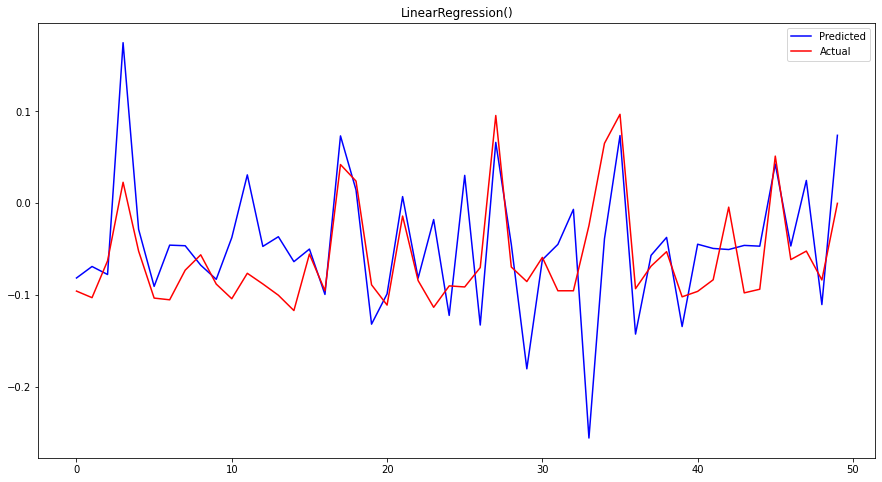

In [90]:
  plt.figure(figsize=(15, 8))
  y_true, y_pred = np.array(Y_test), np.array(Y_pred_lr)
  plt.plot(y_pred[0:50], label='Predicted', color="blue")
  plt.plot(y_true[0:50], label='Actual', color="red")
  plt.title(lr)
  plt.legend()

In [91]:
print(score)

-1.45503486153705


In [92]:
from sklearn.model_selection import GridSearchCV
quad = PolynomialFeatures (degree = 2)
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
x_quad = quad.fit_transform(X_fdf)
X_hat = pd.DataFrame(x_quad)
print(X_hat.shape)
X_train,X_test,y_train,y_test = train_test_split(X_hat,Y_fdf,test_size=0.1, random_state = 0)
#Y_train_pred = model.predict(X_train)

model = XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.01, max_depth =  10, n_estimators = 100).fit(X_train,y_train)
'''clf = GridSearchCV(estimator=model, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)'''
#clf.fit(X_train,y_train)
Y_test_xg = model.predict(X_test)
#print("Best parameters:", clf.best_params_)
#print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))
score = r2_score(y_test,Y_test_xg)
error = mae(y_test,Y_test_xg)
#mdap
mse = mean_squared_error(y_test,Y_test_xg)
y_true, y_pred = np.array(y_test), np.array(Y_test_xg)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100 #mean absolute percntage error
mdape = np.median((np.abs((y_true - y_pred)/ y_true))) * 100 #median absolute percntage error
print(score)
print(error)
print(mse)
print(mape)
print(mdape)

(41956, 105)
0.41661030989643266
0.2386614934174309
0.19283761854994358
465.1895170190217
274.07696045050375


In [93]:
'''trees = np.arange(50, 1000, 50)

for i in trees:
    print("Number of Trees: {}".format(i))
    model = XGBRegressor(n_estimators=i, random_state=0).fit(X_train,y_train)
    Y_pred_xg = model.predict(X_test)
    score = r2_score(y_test,Y_pred_xg)
    error = mae(y_test,Y_pred_xg)
    mse = mean_squared_error(y_test,Y_pred_xg)
    y_true, y_pred = np.array(y_test), np.array(Y_pred_xg)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100 #mean absolute percntage error
    mdape = np.median((np.abs((y_true - y_pred)/ y_true))) * 100 #median absolute percntage error
    print("ith tree:" ,i)
    print(score)
    print(error)
    print(mse)
    print(mape)
    print(mdape)'''

   

'trees = np.arange(50, 1000, 50)\n\nfor i in trees:\n    print("Number of Trees: {}".format(i))\n    model = XGBRegressor(n_estimators=i, random_state=0).fit(X_train,y_train)\n    Y_pred_xg = model.predict(X_test)\n    score = r2_score(y_test,Y_pred_xg)\n    error = mae(y_test,Y_pred_xg)\n    mse = mean_squared_error(y_test,Y_pred_xg)\n    y_true, y_pred = np.array(y_test), np.array(Y_pred_xg)\n    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100 #mean absolute percntage error\n    mdape = np.median((np.abs((y_true - y_pred)/ y_true))) * 100 #median absolute percntage error\n    print("ith tree:" ,i)\n    print(score)\n    print(error)\n    print(mse)\n    print(mape)\n    print(mdape)'

In [94]:
'''Number of Trees: 700
ith tree: 700
0.5491398271739252
0.06533450137259873
0.14903040540768137
81.58963332243673
14.45427677311133'''

'Number of Trees: 700\nith tree: 700\n0.5491398271739252\n0.06533450137259873\n0.14903040540768137\n81.58963332243673\n14.45427677311133'

In [95]:
model = XGBRegressor(n_estimators=700, random_state=0).fit(X_train,y_train)
Y_pred_xg = model.predict(X_test)
score = r2_score(y_test,Y_pred_xg)
error = mae(y_test,Y_pred_xg)
mse = mean_squared_error(y_test,Y_pred_xg)
y_true, y_pred = np.array(y_test), np.array(Y_pred_xg)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100 #mean absolute percntage error
mdape = np.median((np.abs((y_true - y_pred)/ y_true))) * 100 #median absolute percntage error
print(score)
print(error)
print(mse)
print(mape)
print(mdape)

0.527144367570604
0.06600289622392973
0.15630093507381748
88.20667375875524
14.883696977971178


In [96]:
y_true = np.reshape(y_true, (-1, 1))
print(y_true)
y_pred = np.reshape(y_pred, (-1, 1))
print(y_pred)
y_pred = scaler.inverse_transform(y_pred)
print(y_pred)
y_true = scaler.inverse_transform(y_true)
print(y_true)

[[-6.26188205e-02]
 [-1.09796726e-02]
 [-7.23228215e-02]
 [ 7.98513705e-02]
 [ 6.63660755e+00]
 [-3.97451040e-02]
 [-5.91531059e-02]
 [-7.15482343e-02]
 [ 5.86811913e-02]
 [-7.96008222e-02]
 [-9.95479507e-02]
 [-8.51459656e-02]
 [-1.09891168e-01]
 [-5.01422479e-02]
 [-6.26188205e-02]
 [-9.13842519e-02]
 [ 3.22975732e-03]
 [-5.43452924e-03]
 [-9.01608547e-02]
 [-1.09405968e-01]
 [-6.20587611e-02]
 [-8.44528227e-02]
 [-7.35011645e-02]
 [-1.02751796e-01]
 [-7.85611078e-02]
 [-9.83156812e-02]
 [-1.75645304e-02]
 [ 1.03042339e-01]
 [-9.58203666e-02]
 [-6.33812778e-02]
 [-7.88268588e-02]
 [-6.95502498e-02]
 [-8.99979661e-02]
 [-7.91884022e-02]
 [ 3.78869036e-02]
 [-7.30159644e-02]
 [-5.63805342e-02]
 [-1.89508163e-02]
 [-8.37596797e-02]
 [-9.31171092e-02]
 [-1.20218998e-01]
 [-9.83156812e-02]
 [-2.48423925e-02]
 [-7.99473937e-02]
 [-8.23733939e-02]
 [-9.58896809e-02]
 [-7.57885361e-02]
 [-7.40556788e-02]
 [-3.70167192e-03]
 [-7.03127070e-02]
 [-6.08859632e-02]
 [-8.72253944e-02]
 [ 1.3319405

In [97]:
y_true = y_true.flatten()
y_pred = y_pred.flatten()
print(y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100 #mean absolute percntage error
print(mape)

[ 7.57327438e+05  1.30701725e+06  5.73139938e+05  3.53121325e+06
  9.03374900e+06  1.05567288e+06  7.22338562e+05  2.52865600e+06
  1.84286425e+06  5.72843550e+06  3.46042906e+05  3.66613531e+05
  8.85596641e+04  9.67864375e+05  9.08975438e+05  8.95994438e+05
  1.19196788e+06  2.62547575e+06  4.46037031e+05  1.00871414e+05
  1.87028725e+06  5.78205312e+05  5.69403938e+05  3.07862031e+05
  3.70328531e+05  7.86946062e+05  1.07779525e+06  3.38928075e+06
  4.86202781e+05  7.96389562e+05  6.45582312e+05  6.70393562e+05
  3.96069781e+05  8.19028875e+05  1.16971812e+06  2.28177625e+06
  2.59325325e+06  1.11329538e+06  3.24891281e+05  5.60012312e+05
 -4.22898359e+04  3.10415656e+05  1.34329625e+06  8.49555125e+05
  1.70148388e+06  5.49252562e+05  4.74721781e+05  9.50412938e+05
  1.27868188e+06  5.37719438e+05  7.43658188e+05  4.73293156e+05
  1.87194725e+06  1.52898175e+06  9.56866625e+05  5.31761188e+05
  1.45065700e+06  1.71116712e+06  3.86298406e+05  3.14538775e+06
  5.38111062e+05  1.65873

In [98]:
error = mae(y_true,y_pred)
print(error)

952226.3486607143


In [ ]:
hh

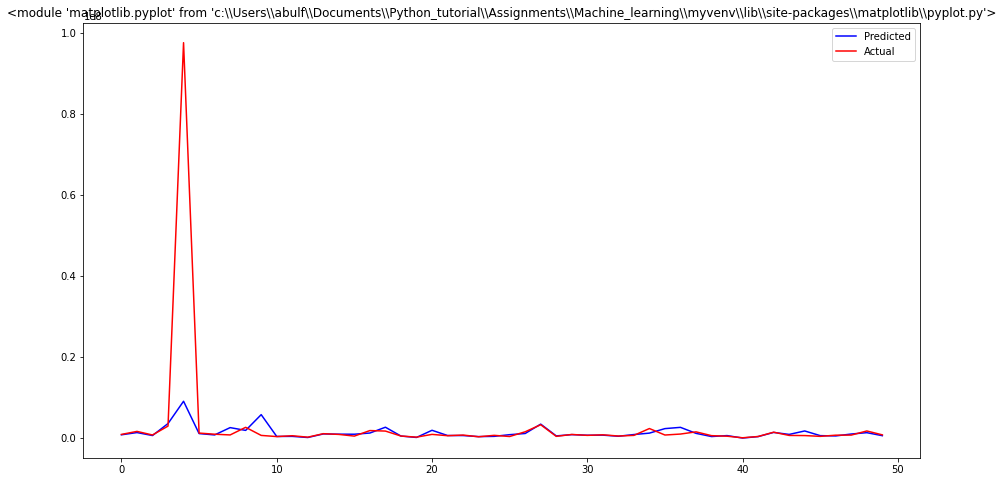

In [99]:
  plt.figure(figsize=(15, 8))
  #y_true, y_pred = np.array(y_test), np.array(y_pred)
  plt.plot(y_pred[0:50], label='Predicted', color="blue")
  plt.plot(y_true[0:50], label='Actual', color="red")
  plt.title(plt)
  plt.legend()

In [100]:
trees = np.arange(50, 1000, 50)

for i in trees:
    print("Number of Trees: {}".format(i))
    rf = RandomForestRegressor(n_estimators=i, random_state=0).fit(X_train,y_train)
    y_pred_rf = rf.predict(X_test)
    score = r2_score(y_test,y_pred_rf)
    error = mae(y_test,y_pred_rf)
    mse = mean_squared_error(y_test,y_pred_rf)
    y_true, y_pred = np.array(y_test), np.array(y_pred_rf)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100 #mean absolute percntage error
    mdape = np.median((np.abs((y_true - y_pred)/ y_true))) * 100 #median absolute percntage error
    print("ith tree:" ,i)
    print(score)
    print(error)
    print(mse)
    print(mape)
    print(mdape)


Number of Trees: 50
ith tree: 50
0.5774558905080731
0.06644255910005388
0.13967062015145396
91.5192562800749
13.890625038996546
Number of Trees: 100
ith tree: 100
0.5312730674525579
0.06744803315905859
0.15493620637454605
91.19726454922278
13.746309170127663
Number of Trees: 150
ith tree: 150
0.5384004030549381
0.06688033265009015
0.1525802881135887
89.86587010766137
13.526098105549176
Number of Trees: 200
ith tree: 200
0.5638007777865667
0.06489935725363817
0.14418427451133622
90.38391304418619
13.829143198498095
Number of Trees: 250
ith tree: 250
0.5808366377802858
0.06394323239321245
0.13855312482379914
88.90251481346168
13.703862654472223
Number of Trees: 300


KeyboardInterrupt: 

In [184]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X_fdf)
X_hat = pd.DataFrame(x_quad)
print(X_hat.shape)
X_train,X_test,y_train,y_test = train_test_split(X_hat,Y_fdf,test_size=0.1, random_state = 0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
score = r2_score(y_test,y_pred_rf)
error = mae(y_test,y_pred_rf)
#mdap
mse = mean_squared_error(y_test,y_pred_rf)
y_true, y_pred = np.array(y_test), np.array(y_pred_rf)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100 #mean absolute percntage error
mdape = np.median((np.abs((y_true - y_pred)/ y_true))) * 100 #median absolute percntage error
print(score)
print(error)
print(mse)
print(mape)
print(mdape)

(41956, 120)
0.3178887074359875
0.06919431606688754
0.47493746550254384
141.97872114781515
13.65331901061751


<AxesSubplot:xlabel='SALE PRICE'>

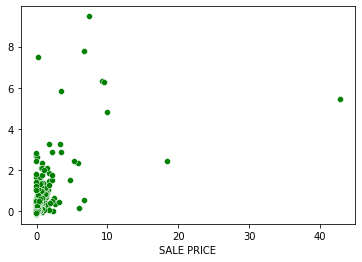

In [185]:
sns.scatterplot(x=y_test , y=y_pred_rf, color="green")

In [186]:
y_true = np.reshape(y_true, (-1, 1))
print(y_true)
y_pred = np.reshape(y_pred, (-1, 1))
print(y_pred)
y_pred = scaler.inverse_transform(y_pred)
print(y_pred)
y_true = scaler.inverse_transform(y_true)
print(y_true)

[[-0.06261882]
 [-0.01097967]
 [-0.07232282]
 ...
 [-0.02028761]
 [ 0.08380762]
 [-0.06941322]]
[[-0.07391047]
 [-0.03238548]
 [-0.09320713]
 ...
 [-0.02627061]
 [-0.02953511]
 [-0.05998057]]
[[ 687095.        ]
 [1286177.62      ]
 [ 408701.31666667]
 ...
 [1374397.02      ]
 [1327300.        ]
 [ 888062.12      ]]
[[ 850000.]
 [1595000.]
 [ 710000.]
 ...
 [1460714.]
 [2962500.]
 [ 751977.]]


In [187]:
y_true = y_true.flatten()
y_pred = y_pred.flatten()
print(y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100 #mean absolute percntage error
print(mape)

[ 687095.         1286177.62        408701.31666667 ... 1374397.02
 1327300.          888062.12      ]
209.87460984163238


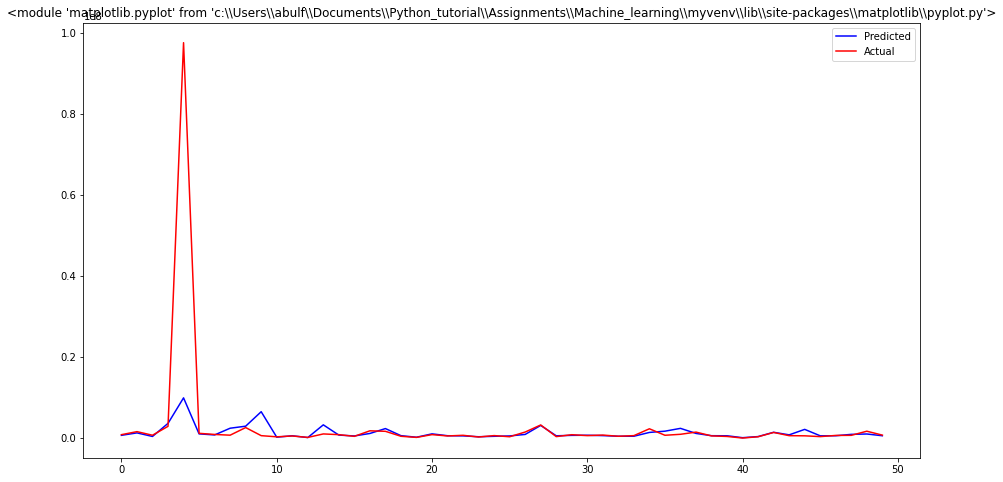

In [188]:
 plt.figure(figsize=(15, 8))
 #y_true, y_pred = np.array(y_test), np.array(y_pred2)
 plt.plot(y_pred[0:50], label='Predicted', color="blue")
 plt.plot(y_true[0:50], label='Actual', color="red")
 plt.title(plt)
 plt.legend()